<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:brown;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Sales Price Prediction
</p>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Task 5 Objective:- Sales Prediction using Python.<br>

<b>Description</b><br>

💡 Sales Prediction means predicting how much of a product people will buy based on the factors such as the amount you spend to advertise the product, the segment of people you advertise for, or the platform you are advertising on about your product.<br>
💡 In this task we have to train a machine learning model to predict their future sales with every step they take to manipulate the cost of advetising their product.<br>
💡 Dataset Link:- https://www.kaggle.com/datasets/bumba5341/advertisingcsv
    
<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color:aliceblue;"><b> Author:- </b> Kumod Sharma</h2>
</div>

<center>
<img src="https://academy-public.coinmarketcap.com/optimized-uploads/a189e72d71ad447b985f6d8ad225ba5a.jpeg" width=600 height=400 />
</center>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Importing Libraries
</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Loading Datasets
</p>
</div>

In [2]:
df = pd.read_csv("C:\\Users\\kumod sharma\\Desktop\\Advertising.csv",index_col=[0])

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Basic Understanding of Data
</p>
</div>

### 1. Checking Dimensions of the Data.

In [5]:
df.shape

(200, 4)

**Observation**
1. From the above output we can say that there are **200 rows/records** and **4 columns/Features** present in our dataset.

### 2. Checking the Data-Types of the Features.

In [6]:
df.dtypes.to_frame().rename(columns={0:"Data-Types"})

,Data-Types
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


**Observation**
1. From above output we can observe all the features are having **numerical** data-types.
2. All the features are having correct data-types. So we don't have to do any changes.

### 3. Checking NaN values in our Dataset.

In [7]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
TV,0
Radio,0
Newspaper,0
Sales,0


**Observation**
1. We can observe that **none of the features is having Missing values**.

### 4. Checking Duplicate Values.

In [8]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


**Observation**
1. From the above output we can say that there is **no duplicate** records present in our dataset.

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis (EDA)
</p>
</div>

### 1. Visualizing our Target ("Sales Feature").

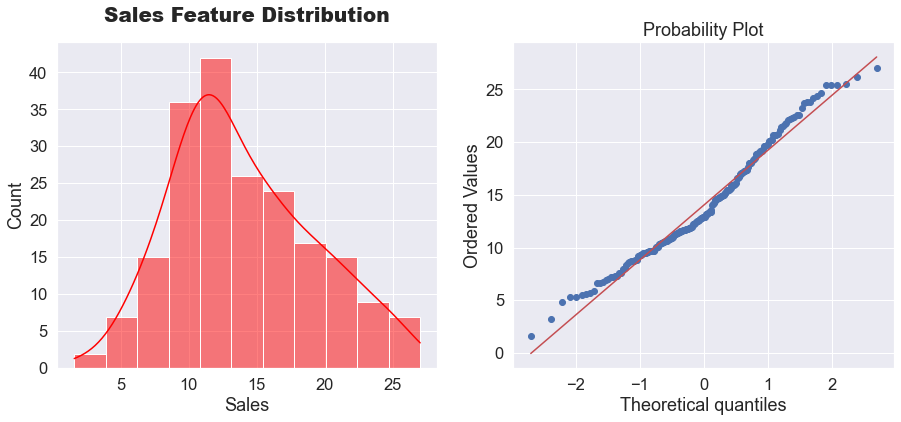

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df["Sales"],color="red",kde=True)
plt.title("Sales Feature Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
stats.probplot(df["Sales"],dist="norm",plot=pylab)
plt.show()


**Observation**
1. Most of the sales values are between **8- 18**.
2. **Sales** Feature is having a kind on **Gauusian Distribution**.
3. So we don't have to perform any Transformations steps.

---

### 2. Visualizing Advertising Features.

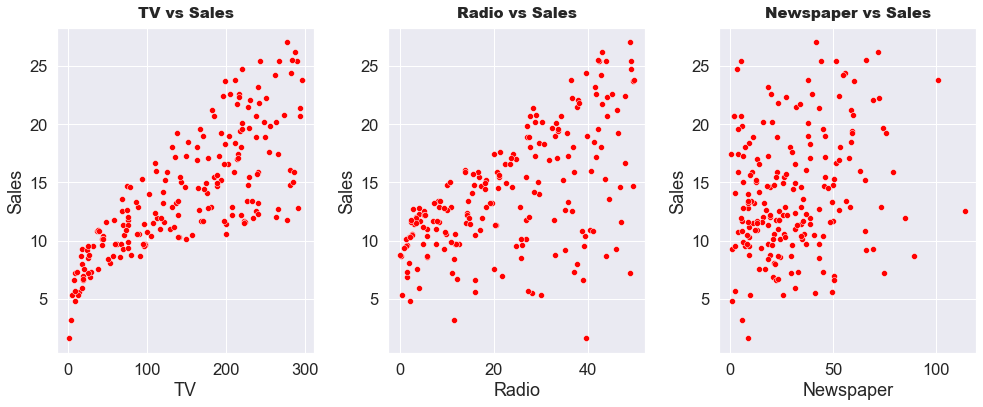

In [10]:
cols = ["TV","Radio","Newspaper"]  ## Advertising Features.
x=1

plt.figure(figsize=(14,6))
for col in cols:
    plt.subplot(1,3,x)
    sns.scatterplot(col,"Sales",data=df,color="red")
    plt.title(f"{col} vs Sales",fontweight="black",pad=10,fontsize=15)
    plt.tight_layout()
    x+=1

**Observation**
1. From **TV vs Sales** Visualization we can clearly see that the **product sales is highly dependent** on **TV Advertisment**
2. From **Radio vs Sales** Visualization we can say that the **product sales is also dependent on Radio Advertisment** but less dependency than **TV Advertisment**.
3. From **Newspaper vs Sales** Visualization we can clearly say that the **Product sales is not at all dependent on Newspaper Avdertisment** because all the data-points are scattered.

---

### 3. Checking The Correlation of Features.

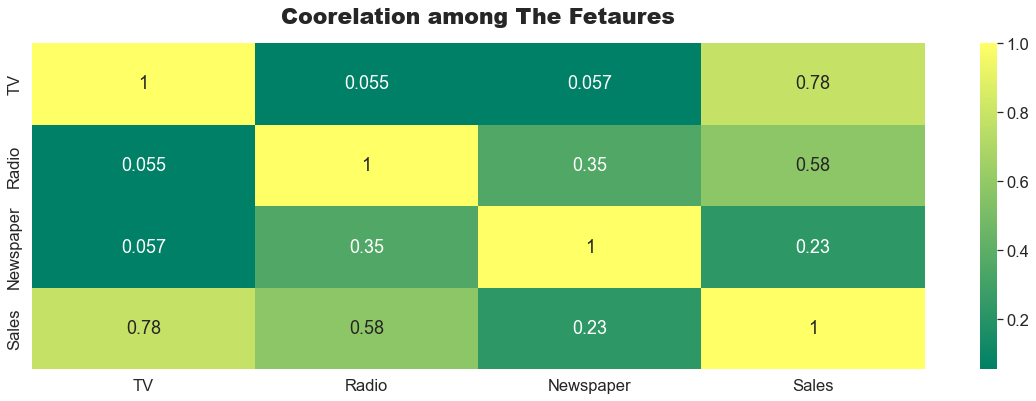

In [11]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,cmap="summer")
plt.title("Coorelation among The Fetaures",fontweight="black",fontsize=22,pad=20)
plt.show()

**Observation**
1. We can observe that **TV Feture** is having the highest correlation with our Target feature.
2. **Radio Feature** is having a positive coorelation with our Target fetaure but less than **TV Feature.**
3. **Newspaper Feature** is having very less correlation with our Target feature.

**Insights**
1. We can make an insight that the sales is mostly dependent on **TV Advertisment** & **Radio Advertisment.**
2. So we can drop **Newspaper feature** before Training our Model.

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Pre-Processing
</p>
</div>

### 1. Selecting Label & Target For Model Training.

In [12]:
x = df.drop(columns=["Sales","Newspaper"])
y = df[["Sales"]]

In [13]:
x.head()

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [14]:
y.head()

,Sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


### 2. Splitting Data For Model training & Tetsing.

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
print(x_train.shape,y_train.shape)

(160, 2) (160, 1)


In [17]:
print(x_test.shape,y_test.shape)

(40, 2) (40, 1)


---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Creation
</p>
</div>

### Creating Linear Regression Model.

In [18]:
model = LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

### Model Prediction for Training & Testing Data.

In [20]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

### Checking Accuracy of Model Prediction.

In [21]:
print("Accuraacy on Training Data is: ",r2_score(y_train,train_pred)*100)

Accuraacy on Training Data is:  89.55982149747163


In [22]:
print("Accuracy on Tetsing Data is:",r2_score(y_test,test_pred)*100)

Accuracy on Tetsing Data is: 90.05833101920356


**Obseravtion**
1. We can clearly observe that we got an accuracy of **89 on training data** and **90 on testing data**.
2. So we can conclude that our model is having a kind of **best fitting.**

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Evaluation
</p>
</div>

### 1. Mean Sqaured Error.

In [23]:
mean_squared_error(y_test,test_pred)

3.1379480090683516

### 2. Root Mean Squared Error.

In [24]:
rmse = 0.5**mean_squared_error(y_test,test_pred)
rmse

0.11360135837622083

### 3. Mean Absolute Error.

In [25]:
mean_absolute_error(y_test,test_pred)

1.444302313822758

### 4. Mean Absolute Percentage Error.

In [26]:
mean_absolute_percentage_error(y_test,test_pred)

0.15090256196305074

**Observation**
1. A lower **MSE** & **RMSE** values indicates that the model will perform better while predicting future sales.
2. Similary the lower value of **MAE** & **MAPE** values indicates that the model will perform better while predicting future sales.

---

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Conclusion:-</b>
 </h2>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Sales Price Prediction using Python</b><br>

<b>Key-Points</b><br>    
💡 First we imported all the neccessary Libraries for model creation then we loaded the dataset.<br>
💡 After that we did the basic understanding of the dataset.<br>
💡 After that we performed Exploratory Data Analysis.<br>
💡 Then we cretaed our Linear Regression Model for Sales Prediction.<br>
💡 Then using the Regression model we did the prediction and checked the accuracy of the model.<br>
💡 Then we evaluated the Model Performance.<br>
💡 Finally we obtained a model with high r2_Score and low MSE,RMSE,MAE,MAPE values.<br>
💡 So we can conclude that the model is perfectly created and trained.
</div>

---